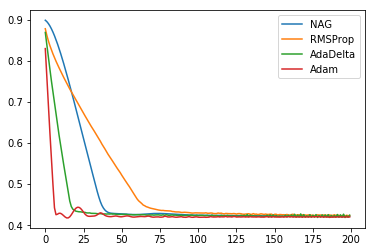

In [1]:

from sklearn.datasets import load_svmlight_file
import matplotlib.pyplot as plt
import numpy as np


def loss(X, y, W, b, C=1):
    loss1 = np.sum(np.maximum(0, 1 - y * (np.dot(X, W) + b)))
    loss2 = (0.5 * np.sum(W ** 2) + C * loss1) / X.shape[0]
    return loss2


def gradient(X, y, w, b, C=1):
    yTemp = -y
    yTemp[(1 - y * (np.dot(X, w) + b)) < 0] = 0
    Jw = w + C / X.shape[0] * np.dot(X.T, yTemp)
    Jb = C / X.shape[0] * np.sum(yTemp)
    return Jw, Jb


def NAG(X_train, y_train,  X_test, y_test, learning_rate, Iteration_num, gammaC=1, batch_size=1000):
    w = np.zeros(X_train.shape[1]).T
    b = 0

    vw = np.zeros(w.shape)
    loss_val = []
    vb = 0
    gamma = 0.9

    for i in range(Iteration_num):

        index = list(set(np.random.randint(0, X_train.shape[0], size=batch_size)))

        dx = X_train[index]
        dy = y_train[index]

        #NAG
        w_gt, b_gt = gradient(dx, dy, w - gamma * vw, b - gamma * vb, C=gammaC)
        vw = gamma * vw + learning_rate * w_gt
        w = w - vw
        vb = gamma * vb + learning_rate * b_gt
        b = b - vb


        loss_val.append(loss(X_test, y_test, w, b, C=gammaC))
    return  loss_val


def RMSProp(X_train, y_train, X_test, y_test, learning_rate, Iteration_num,  gammaC=1, batch_size=1000):
    w = np.zeros(X_train.shape[1]).T
    b = 0

    loss_val = []

    wG = np.zeros(w.shape)
    gamma = 0.9
    bG = 0
    e = 1e-9
    learnRate = 0.001

    for i in range(Iteration_num):
        index = list(set(np.random.randint(0, X_train.shape[0], size=batch_size)))
        dx = X_train[index]
        dy = y_train[index]

        #RMSProp
        wg, bg = gradient(dx, dy, w, b, C=gammaC)
        wG = gamma * wG + (1 - gamma) * (wg ** 2)
        w = w - learnRate / np.sqrt(wG + e) * wg
        bG = gamma * bG + (1 - gamma) * (bg ** 2)
        b = b - learnRate / np.sqrt(bG + e) * bg


        loss_val.append(loss(X_test, y_test, w, b, C=gammaC))

    return  loss_val


def AdaDelta(X_train, y_train, X_test, y_test,learning_rate, Iteration_num,  gammaC=1, batch_size=1000):
    w = np.zeros(X_train.shape[1]).T
    b = 0

    loss_val = []
    gamma = 0.95
    wG = np.zeros(w.shape)
    wt = np.zeros(w.shape)
    bG = 0
    bt = 0
    e = 1e-6


    for i in range(Iteration_num):
        index = list(set(np.random.randint(0, X_train.shape[0], size=batch_size)))
        dx = X_train[index]
        dy = y_train[index]
        wg, bg = gradient(dx, dy, w, b, C=gammaC)

        #AdaDeltacA
        wG = gamma * wG + (1 - gamma) * (wg ** 2)
        wdw = - (np.sqrt(wt + e) / np.sqrt(wG + e)) * wg
        w = w + wdw
        wt = gamma * wt + (1 - gamma) * (wdw ** 2)
        bG = gamma * bG + (1 - gamma) * (bg ** 2)
        bdw = - (np.sqrt(bt + e) / np.sqrt(bG + e)) * bg
        b = b + bdw
        bt = gamma * bt + (1 - gamma) * (bdw ** 2)


        loss_val.append(loss(X_test, y_test, w, b, C=gammaC))

    return  loss_val


def Adam(X_train, y_train,  X_test, y_test, learning_rate, Iteration_num, gammaC=1, batch_size=1000):
    w = np.zeros(X_train.shape[1]).T
    b = 0

    loss_val = []
    learnRate = 1e-2
    beta = 0.9
    gamma = 0.9
    e = 1e-8

    wm = np.zeros(w.shape)
    wG = np.zeros(w.shape)

    bm = 0
    bG = 0

    for i in range(Iteration_num):
        index = list(set(np.random.randint(0, X_train.shape[0], size=batch_size)))
        dx = X_train[index]
        dy = y_train[index]
        w_gt, b_gt = gradient(dx, dy, w, b, C=gammaC)

        #Adam
        wm = beta * wm + (1 - beta) * w_gt
        wG = gamma * wG + (1 - gamma) * (w_gt ** 2)
        alp = learnRate * np.sqrt(1 - gamma ** (i + 1)) / (1 - beta ** (i + 1))
        w = w - alp * wm / np.sqrt(wG + e)
        bm = beta * bm + (1 - beta) * b_gt
        bG = gamma * bG + (1 - gamma) * (b_gt ** 2)
        alp = learnRate * np.sqrt(1 - gamma ** (i + 1)) / (1 - beta ** (i + 1))
        b = b - alp * bm / np.sqrt(bG + e)

        loss_val.append(loss(X_test, y_test, w, b, C=gammaC))

    return  loss_val


def train(X, y, X_test, y_test):

    learn_gate = 0.001
    IterationNum = 200
    gammaC = 0.9
    batchSize = 3000

    NAGLoss = NAG(X, y, X_test, y_test, learn_gate, IterationNum,  gammaC=gammaC,batch_size=batchSize)
    RMSPropLoss = RMSProp(X, y, X_test, y_test, learn_gate, IterationNum, gammaC=gammaC, batch_size=batchSize)
    AdaDeltaLoss = AdaDelta(X, y, X_test, y_test, learn_gate, IterationNum, gammaC=gammaC, batch_size=batchSize)
    AdamLoss = Adam(X, y, X_test, y_test,  learn_gate, IterationNum, gammaC=gammaC,batch_size=batchSize)


    plt.plot(np.arange(IterationNum), NAGLoss, label='NAG')
    plt.plot(np.arange(IterationNum), RMSPropLoss, label='RMSProp')
    plt.plot(np.arange(IterationNum), AdaDeltaLoss, label='AdaDelta')
    plt.plot(np.arange(IterationNum), AdamLoss, label='Adam')

    plt.legend(loc=1)
    plt.show()

def main():
    data_train = load_svmlight_file("D:\\RL\\a9a.txt")
    data_validation = load_svmlight_file('D:\\RL\\a9a.t', n_features=123)

    X_train = data_train[0].toarray()
    y_train = data_train[1]

    X_test = data_validation[0].toarray()
    y_test = data_validation[1]

    train(X_train, y_train, X_test, y_test)

if __name__ == '__main__':
    main()
